In [ ]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("obesity_child_age.csv")

In [ ]:
data.shape


(99, 6)

In [ ]:
data.isnull().sum()


index           0
Time            0
Age             0
Gender          0
PercentObese    0
SE              0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data1 = data


In [ ]:
data1.drop('index', axis=1, inplace=True)


In [ ]:
#separating Time into StartYear and EndYear
#separating Age into MinAge and MaxAge
from sklearn.preprocessing import StandardScaler
# data['Time'] = data['Time'].apply(lambda x: [int(year) for year in x.strip('[]').split(',')])
# data['StartYear'] = data['Time'].apply(lambda x: x[0])
# data['EndYear'] = data['Time'].apply(lambda x: x[1])
# data.drop('Time', axis=1, inplace=True)

data1['StartYear'] = data1['Time'].apply(lambda x: int(x.strip('[]').split(',')[0]))
data1['EndYear'] = data1['Time'].apply(lambda x: int(x.strip('[]').split(',')[1]))
data1.drop('Time', axis=1, inplace=True)

# 1. Convert string representations of age ranges to separate minimum and maximum ages
# Extract minimum and maximum ages from the list
data1.Age = data1.Age.str.strip('[]')
data1[['MinAge', 'MaxAge']] = data1['Age'].str.extract("(\d+),(\d+)", expand=True).astype(int)
data1.drop('Age', axis=1, inplace=True)

In [ ]:
#get dummies for gender column
gender = pd.get_dummies(data1.Gender)
data1 = data1.join(gender)
data1.drop('Gender', axis=1, inplace=True)
data1 = data1.replace(to_replace = [True,False],value = ['1','0'])

In [ ]:
data1


,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,5.0,-0.6,1971,1974,2,5,1,0,0
1,5.0,-0.6,1976,1980,2,5,1,0,0
2,7.2,-0.7,1988,1994,2,5,1,0,0
3,10.3,-1.7,1999,2000,2,5,1,0,0
4,10.6,-1.8,2001,2002,2,5,1,0,0
...,...,...,...,...,...,...,...,...,...
94,17.3,-2.1,2005,2006,12,19,0,1,0
95,16.8,-2.0,2007,2008,12,19,0,1,0
96,17.1,-1.3,2009,2010,12,19,0,1,0
97,20.7,-2.0,2011,2012,12,19,0,1,0


In [ ]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PercentObese  99 non-null     float64
 1   SE            99 non-null     float64
 2   StartYear     99 non-null     int64  
 3   EndYear       99 non-null     int64  
 4   MinAge        99 non-null     int64  
 5   MaxAge        99 non-null     int64  
 6   All           99 non-null     uint8  
 7   F             99 non-null     uint8  
 8   M             99 non-null     uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 5.1 KB


In [ ]:
data1['M']=data1['M'].astype(str).astype(int)
data1['F']=data1['F'].astype(str).astype(int)
data1['All']=data1['All'].astype(str).astype(int)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PercentObese  99 non-null     float64
 1   SE            99 non-null     float64
 2   StartYear     99 non-null     int64  
 3   EndYear       99 non-null     int64  
 4   MinAge        99 non-null     int64  
 5   MaxAge        99 non-null     int64  
 6   All           99 non-null     int64  
 7   F             99 non-null     int64  
 8   M             99 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 7.1 KB


In [ ]:
data1


,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,5.0,-0.6,1971,1974,2,5,1,0,0
1,5.0,-0.6,1976,1980,2,5,1,0,0
2,7.2,-0.7,1988,1994,2,5,1,0,0
3,10.3,-1.7,1999,2000,2,5,1,0,0
4,10.6,-1.8,2001,2002,2,5,1,0,0
...,...,...,...,...,...,...,...,...,...
94,17.3,-2.1,2005,2006,12,19,0,1,0
95,16.8,-2.0,2007,2008,12,19,0,1,0
96,17.1,-1.3,2009,2010,12,19,0,1,0
97,20.7,-2.0,2011,2012,12,19,0,1,0


In [ ]:
from ctgan import CTGAN

# initialize the CTGAN model
model = CTGAN()

# fit the model to the original data
model.fit(data1)

# generate synthetic data
synthetic_data = model.sample(len(data1))
synthetic_data1 = model.sample(len(data1))
synthetic_data2 = model.sample(len(data1))
synthetic_data3 = model.sample(len(data1))
synthetic_data4 = model.sample(len(data1))

# save the synthetic data to a CSV file
synthetic_data.to_csv('synthetic_data.csv', index=False)
synthetic_data1.to_csv('synthetic_data1.csv', index=False)
synthetic_data2.to_csv('synthetic_data2.csv', index=False)
synthetic_data3.to_csv('synthetic_data3.csv', index=False)
synthetic_data4.to_csv('synthetic_data4.csv', index=False)

In [ ]:
synthetic_data.head()


,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,20.215545,-0.868872,2017,2016,8,8,1,0,0
1,9.031269,-1.155822,2005,2000,13,11,0,1,0
2,11.943578,-1.731162,2014,1997,4,10,0,1,0
3,6.840703,-0.960657,2009,2009,1,11,0,0,0
4,8.400755,-2.698691,1987,1993,12,13,0,1,1


In [ ]:
# Concatenate the original and synthetic data
data2 = pd.concat([data1,synthetic_data], ignore_index=True)
data2 = pd.concat([data2,synthetic_data1], ignore_index=True)
data2 = pd.concat([data2,synthetic_data2], ignore_index=True)
data2 = pd.concat([data2,synthetic_data3], ignore_index=True)
data2 = pd.concat([data2,synthetic_data4], ignore_index=True)

In [ ]:
data2

,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,5.000000,-0.600000,1971,1974,2,5,1,0,0
1,5.000000,-0.600000,1976,1980,2,5,1,0,0
2,7.200000,-0.700000,1988,1994,2,5,1,0,0
3,10.300000,-1.700000,1999,2000,2,5,1,0,0
4,10.600000,-1.800000,2001,2002,2,5,1,0,0
...,...,...,...,...,...,...,...,...,...
589,12.252676,-1.865460,2013,1999,14,10,0,1,0
590,22.026476,-1.813191,2008,1997,2,18,0,1,1
591,7.738989,-2.050163,1998,2001,7,5,0,1,1
592,21.634207,-1.557926,2017,2005,6,8,0,0,1


In [ ]:
data2.to_csv('data2.csv', index=False)


<Axes: >

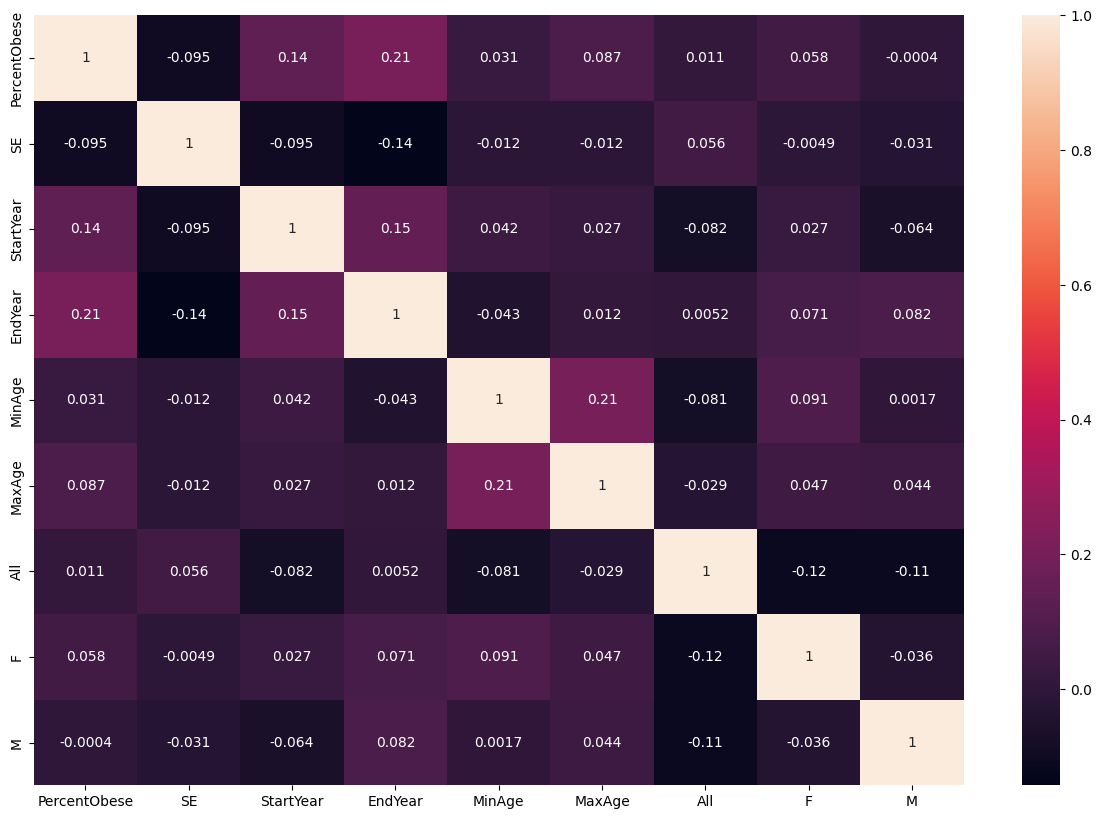

In [ ]:
#correlation map
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(), annot = True)

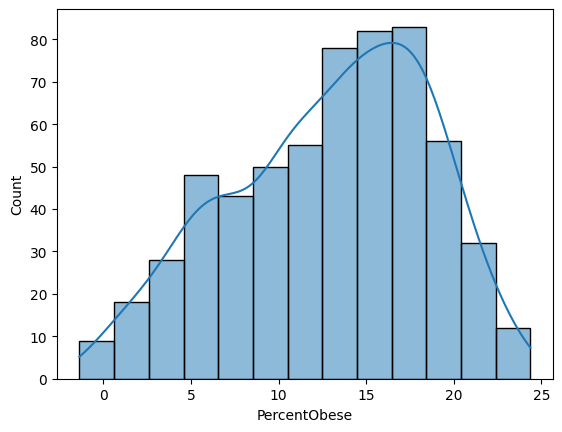

In [ ]:
sns.histplot(data=data2, x='PercentObese', kde=True)
plt.show()

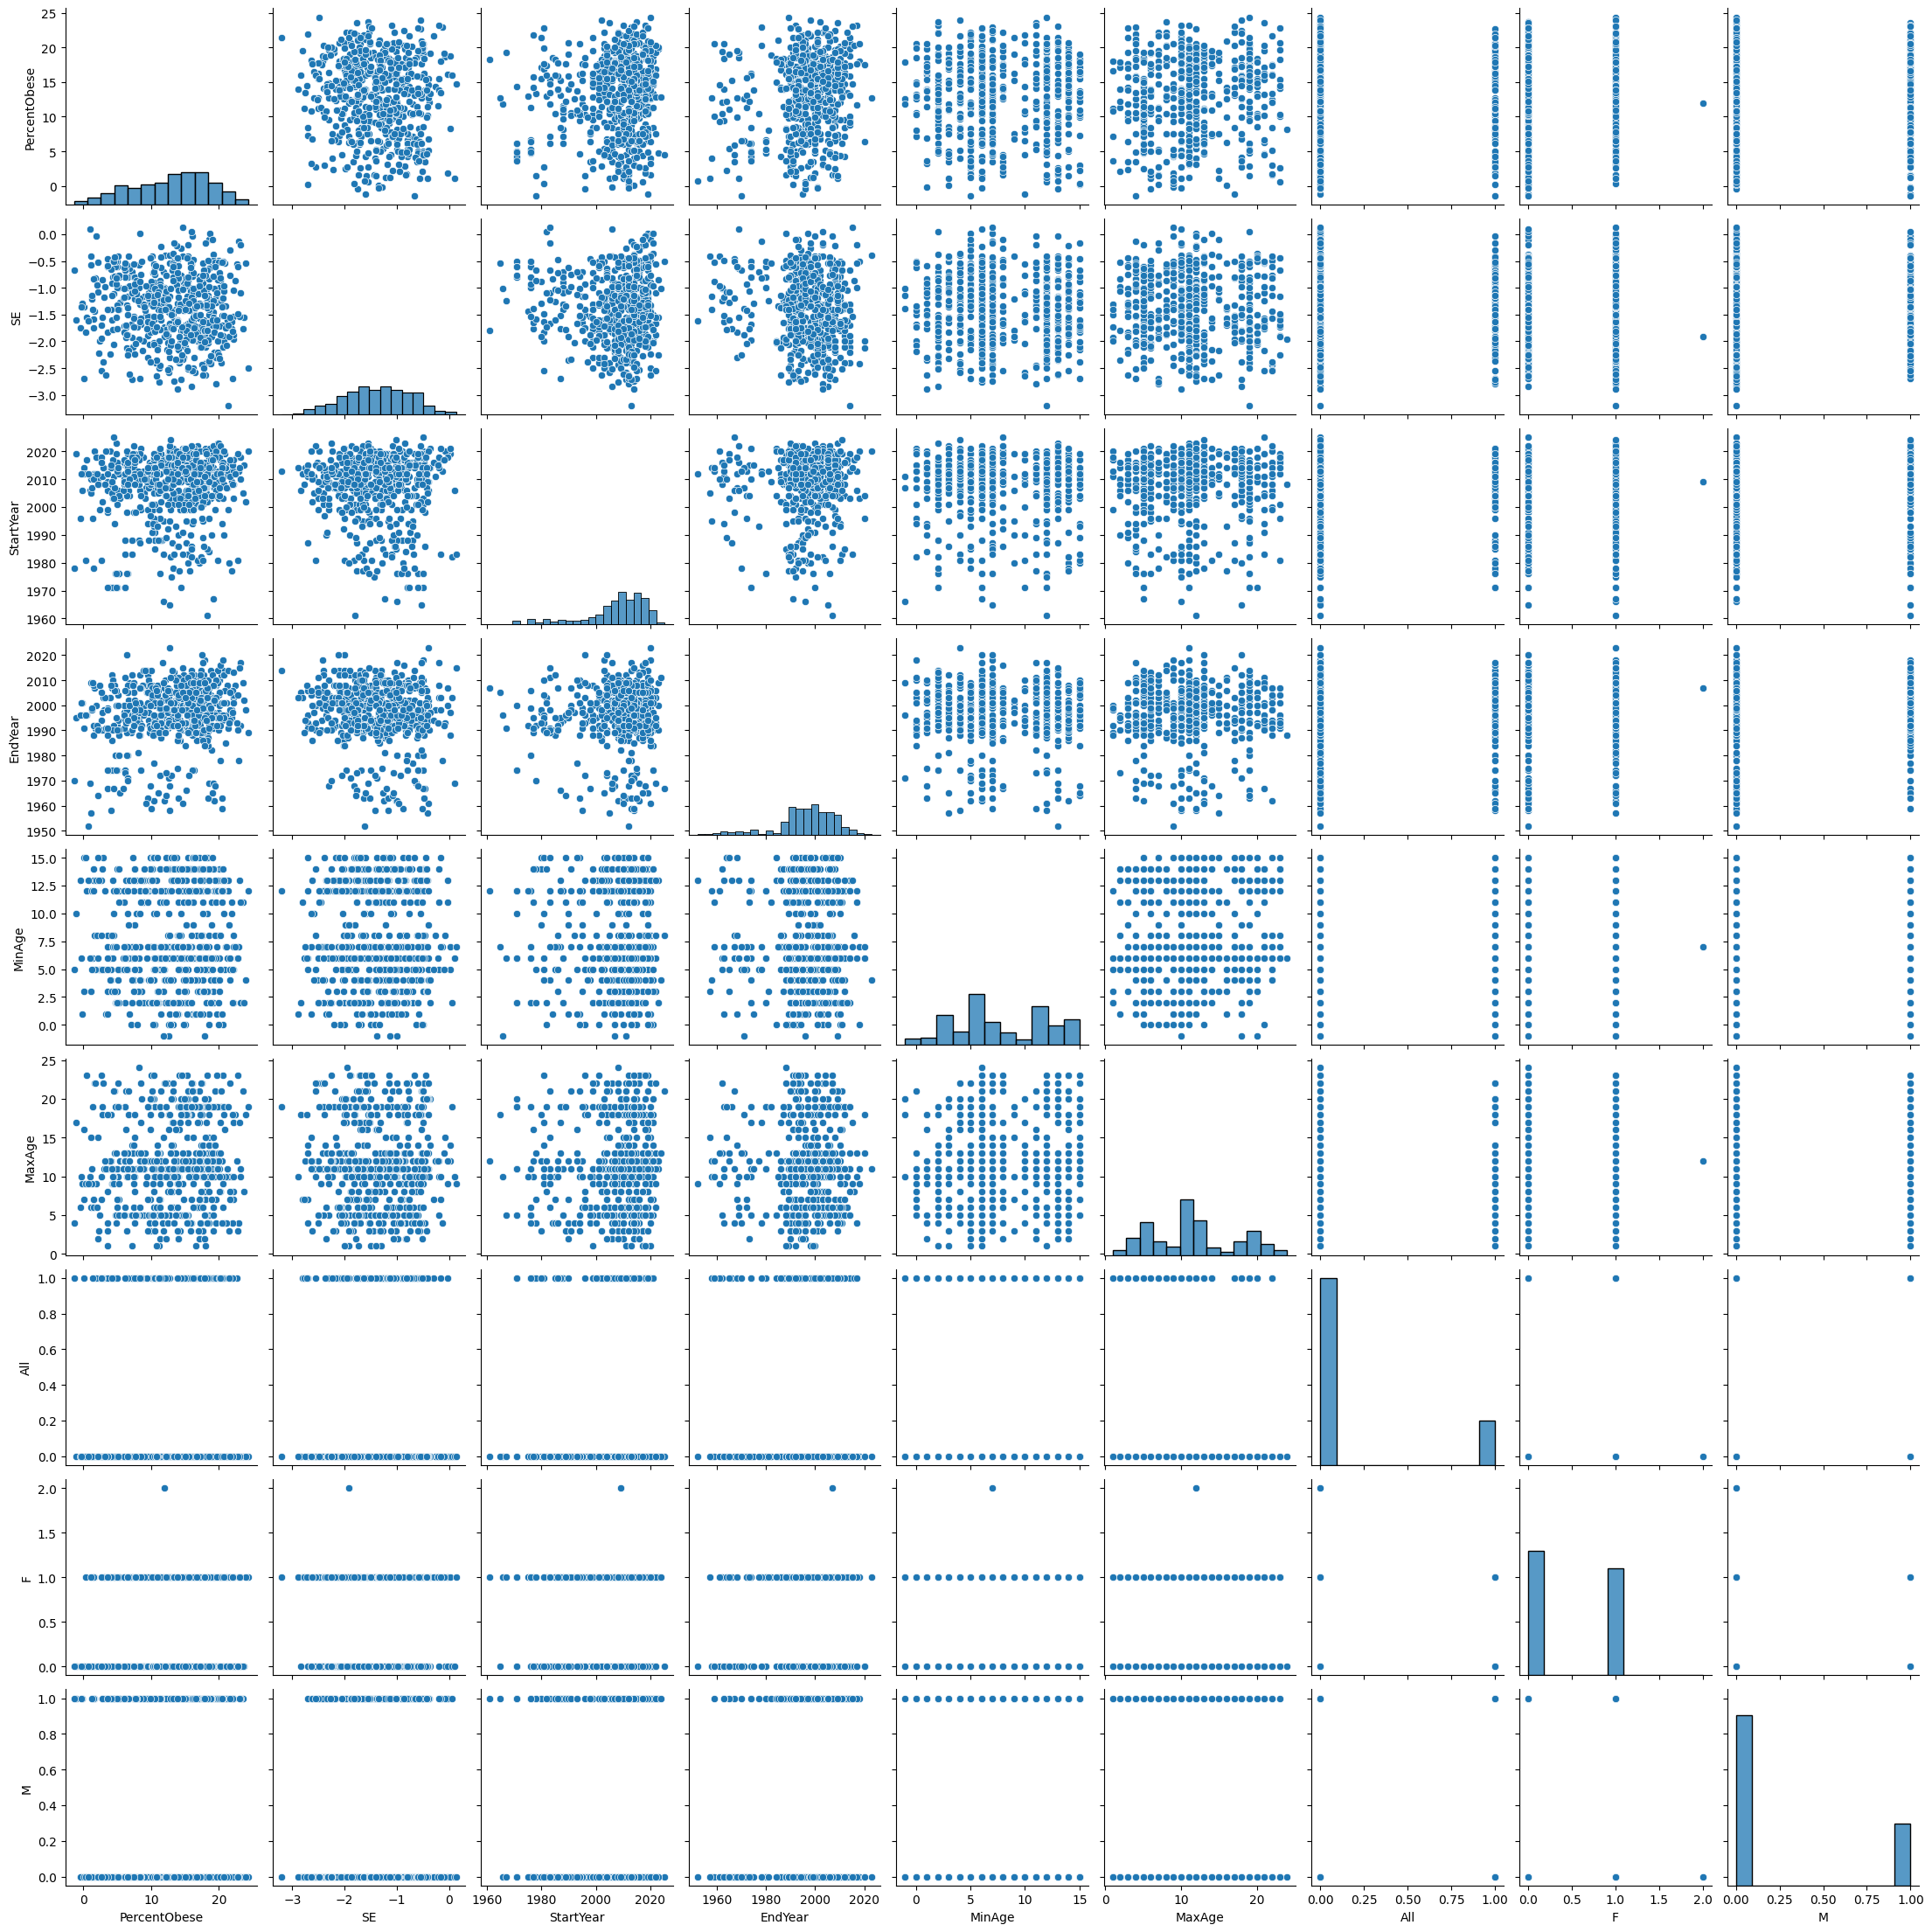

In [ ]:
sns.pairplot(data2)
plt.show()

In [ ]:
# 3. Standardize the continuous-valued features 'Age' and 'PercentObese'
continuous_features = ['PercentObese', 'MinAge', 'MaxAge']
scaler = StandardScaler()
data2[continuous_features] = scaler.fit_transform(data2[continuous_features])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, ensemble
from pandas import Series, DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from hmmlearn import hmm

In [ ]:
X=data2.drop(['PercentObese','SE'],axis=1)
Y=data2['PercentObese']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state=20)
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

train_data = X_train.join(Y_train)
test_data = X_test.join(Y_test)
val_data = x_val.join(y_val)
train_data.head()

,StartYear,EndYear,MinAge,MaxAge,All,F,M,PercentObese
268,2018,1992,1.204694,-0.263739,1,0,0,0.998034
177,2009,2007,-0.176306,0.098902,0,2,0,-0.164807
162,2015,2001,1.434861,-1.532982,0,1,0,-0.530971
126,1999,2000,1.434861,-0.263739,0,1,1,-0.021348
563,2016,2012,1.204694,-0.082418,0,0,0,0.756100


array([[<Axes: title={'center': 'StartYear'}>,
        <Axes: title={'center': 'EndYear'}>,
        <Axes: title={'center': 'MinAge'}>],
       [<Axes: title={'center': 'MaxAge'}>,
        <Axes: title={'center': 'All'}>, <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'M'}>,
        <Axes: title={'center': 'PercentObese'}>, <Axes: >]], dtype=object)

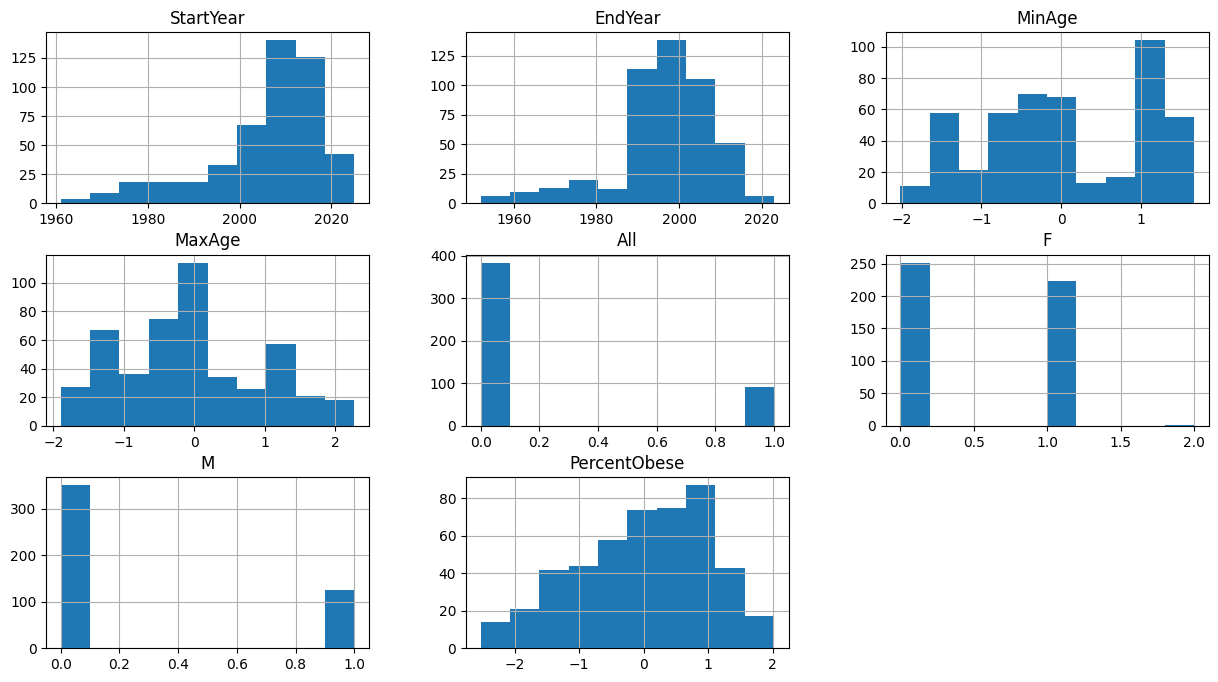

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
# (Update: Done) ... Data preprocessing steps ...

In [ ]:
# (Update: Done)
# Generate synthetic data using CTGAN
# ... CTGAN code ...

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Ridge Regression model
ridge = Ridge(alpha=0.5)  # You can adjust the alpha parameter for regularization strength
ridge.fit(X_train, Y_train)

# Make predictions using the trained Ridge Regression model
Y_pred_ridge = ridge.predict(X_test)

# Evaluate the Ridge Regression model
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)
print("Ridge Regression:")
print("Mean Squared Error:", mse_ridge)
print("R^2 Score:", r2_ridge)

# Create and train the Lasso Regression model
lasso = Lasso(alpha=0.5)  # You can adjust the alpha parameter for regularization strength
lasso.fit(X_train, Y_train)

# Make predictions using the trained Lasso Regression model
Y_pred_lasso = lasso.predict(X_test)

# Evaluate the Lasso Regression model
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
r2_lasso = r2_score(Y_test, Y_pred_lasso)
print("Lasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("R^2 Score:", r2_lasso)


Ridge Regression:
Mean Squared Error: 0.8360890848241271
R^2 Score: 0.06445197226739618
Lasso Regression:
Mean Squared Error: 0.8339338304085224
R^2 Score: 0.06686361003947061


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions using the trained model
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.8361567177675876
R^2 Score: 0.06437629388812693


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
